In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# Task:
1) Install and import all necessary libraries in your Jupyter notebook.
2) Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
3) Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
4) Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.
5) Use the elbow technique as shown in the Jupyter notebook for this Exercise.
6) Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
7) Explain why you chose that number in a markdown cell.
8) Run the k-means algorithm.
9) Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
10) Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
11) Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
12) Note down your thoughts in a markdown cell.
13) Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
14) Propose what these results could be useful for in future steps of an analytics pipeline.

In [3]:
### Create datapath to Final Project Folder - Data
datapath = r'/Users/gabrielconfrey/Desktop/Data Analysis/Career Foundry/Achievement 6/Final Project/Data'

In [4]:
# IMPORTING DATASET OF HOME PRICES ONLY
df_hum = pd.read_pickle(os.path.join(datapath, '2. Cleaned', 'house_priceONLY.pkl'))

In [5]:
df_hum.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
0,Abington,2021,500000,house_price,Plymouth,NaN,73,5798,78395
1,Abington,2020,432750,house_price,Plymouth,NaN,73,5798,78395
2,Abington,2019,385000,house_price,Plymouth,16668.0,73,5798,78395
3,Abington,2018,395000,house_price,Plymouth,16532.0,73,5798,78395
4,Abington,2016,345000,house_price,Plymouth,16335.0,73,5798,78395


In [6]:
# DROPPING NULLS FROM POPULATION
df_hum.dropna(subset=['Population'], inplace=True)

In [7]:
df_hum.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
2,Abington,2019,385000,house_price,Plymouth,16668.0,73,5798,78395
3,Abington,2018,395000,house_price,Plymouth,16532.0,73,5798,78395
4,Abington,2016,345000,house_price,Plymouth,16335.0,73,5798,78395
5,Abington,2015,319450,house_price,Plymouth,16266.0,73,5798,78395
9,Acton,2019,630000,house_price,Middlesex,23662.0,81,4150,133931


In [8]:
# Renaming to simply df
df = df_hum

In [9]:
df.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
2,Abington,2019,385000,house_price,Plymouth,16668.0,73,5798,78395
3,Abington,2018,395000,house_price,Plymouth,16532.0,73,5798,78395
4,Abington,2016,345000,house_price,Plymouth,16335.0,73,5798,78395
5,Abington,2015,319450,house_price,Plymouth,16266.0,73,5798,78395
9,Acton,2019,630000,house_price,Middlesex,23662.0,81,4150,133931


In [10]:
# REMOVING CATEGORICAL COLUMNS FOR K-MEANS TESTING
## Syntax: df.drop(columns = ['colA','colB'], inplace = True)
### Syntax for choosing year
#### df_2021 = df.loc[(df['Year'] == 2021) & (df['Type'] == "house_price")]
# First, only 2019 data:
df_2019 = df.loc[(df['Year'] == 2019)]

In [11]:
df_2019['Year'].value_counts()

Year
2019    133
Name: count, dtype: int64

In [12]:
# Removing categorical data from df_2019
df_2019.drop(columns = ['Town','Year','Type','County'], inplace = True)

/var/folders/t0/2pp7bcps729654l63mn9fmhh0000gn/T/ipykernel_47604/3012987921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.drop(columns = ['Town','Year','Type','County'], inplace = True)


In [13]:
df_2019.head()

,Value,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
2,385000,16668.0,73,5798,78395
9,630000,23662.0,81,4150,133931
16,675000,36356.0,81,24877,115567
23,820000,45531.0,62,20459,111652
30,294000,3219.0,97,1072,82778


### Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_2019).score(df_2019) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/gabrielconfrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielconfrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielconfrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielconfrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

[-10075600062906.766,
 -3600041428341.386,
 -1910062086135.7876,
 -1407774075982.7756,
 -984211838117.3757,
 -614804490635.6902,
 -458360692773.30225,
 -350614223557.7499,
 -293549505492.48376]

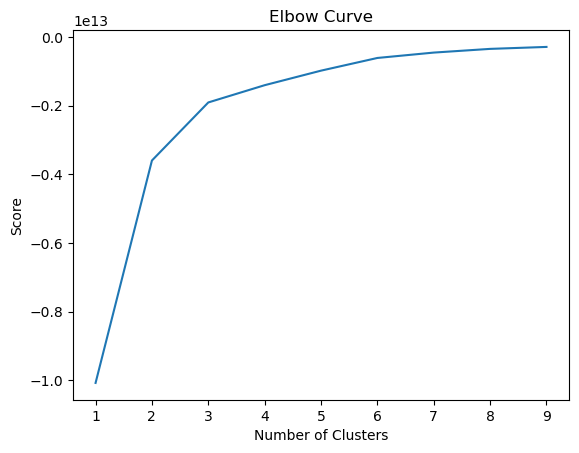

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### IDEAL NUMBER OF CLUSTERS IS 3

6) Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
7) Explain why you chose that number in a markdown cell.
8) Run the k-means algorithm.
9) Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
10) Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
11) Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
12) Note down your thoughts in a markdown cell.
13) Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
14) Propose what these results could be useful for in future steps of an analytics pipeline.

### 3 is the ideal number of clusters because it is at the elbow of the graph above, before the line flattens significantly.

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_2019)

/Users/gabrielconfrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
df_2019['clusters'] = kmeans.fit_predict(df_2019)

/Users/gabrielconfrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/t0/2pp7bcps729654l63mn9fmhh0000gn/T/ipykernel_47604/695199995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['clusters'] = kmeans.fit_predict(df_2019)


In [20]:
df_2019.head()

,Value,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income,clusters
2,385000,16668.0,73,5798,78395,0
9,630000,23662.0,81,4150,133931,2
16,675000,36356.0,81,24877,115567,2
23,820000,45531.0,62,20459,111652,2
30,294000,3219.0,97,1072,82778,0


In [21]:
### Exporting dataset with clusters
df_2019.to_csv(os.path.join(datapath, '2. Cleaned', 'clusters2019.csv'))

10) Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.
11) Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
12) Note down your thoughts in a markdown cell.
13) Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
14) Propose what these results could be useful for in future steps of an analytics pipeline.

In [22]:
# REMOVING THE POPULATION OUTLIERS, AS I DID IN THE LAST TASK
df_2019sm = df_2019[df_2019['Population'] < 200000]

In [23]:
df_2019sm['Population'].max()

110997.0

### I want to compare
1) Population and % Homeowners
2) Population and Household Income
3) Homeowners and Household Income

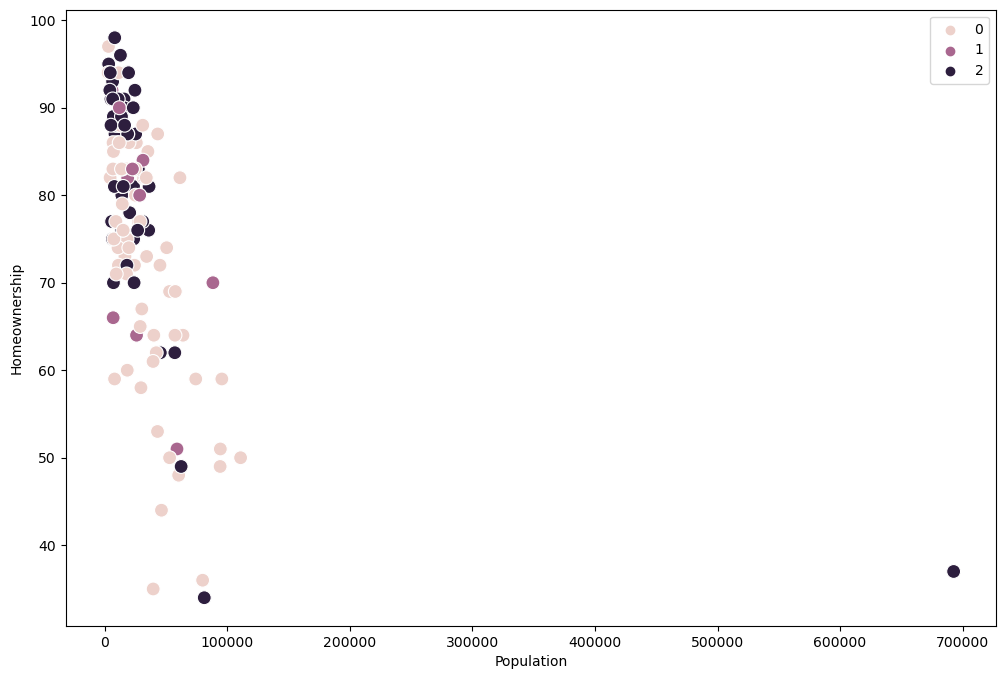

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019['Population'], y=df_2019['2011 % Homeowners'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Homeownership') # Label y-axis.
plt.show()

### This clustering doesn't offer much insight, as all three clusters map each other fairly closely.

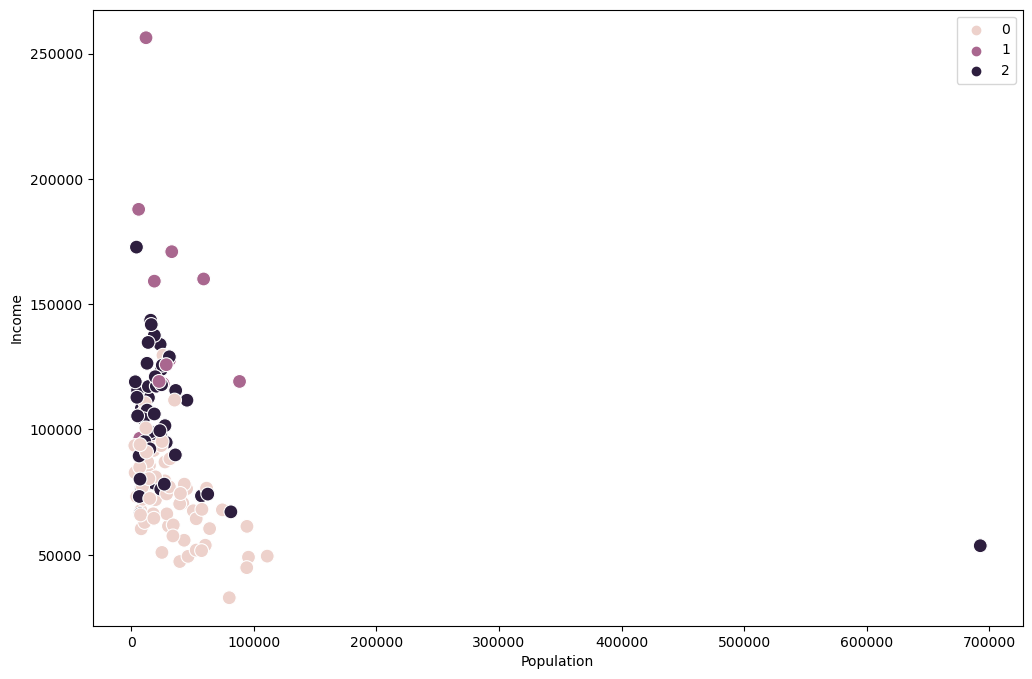

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019['Population'], y=df_2019['2019 Median Household Income'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Income') # Label y-axis.
plt.show()

### This cluster begins to offer some insight. C0 have high income and populations < 100k. These could be labeled "exclusive communities". C2 is mostly mid-upper income, and spans the same community size, in addition to the outlier. This could be "middle class urban/suburban". C1 has the lowest avg income, also under 100k. This could be "lower class suburban".

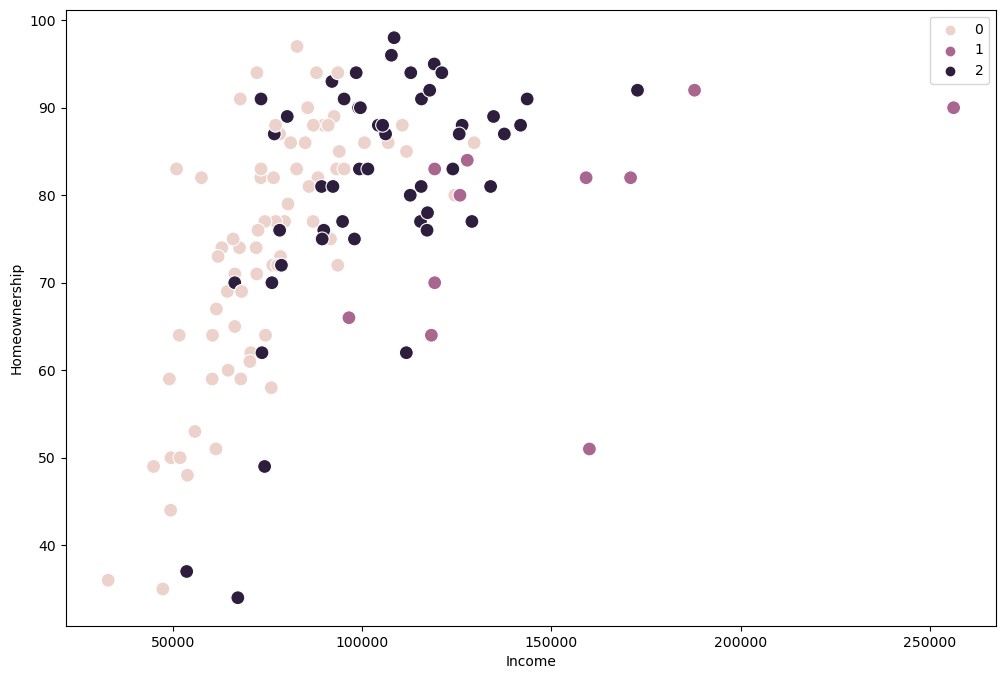

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019['2019 Median Household Income'], y=df_2019['2011 % Homeowners'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Income') # Label x-axis.
plt.ylabel('Homeownership') # Label y-axis.
plt.show()

### This cluster in concert with the 2nd on income and population paints the picture. If C0 is exclusive communities, C2 is middle class and C1 is lower class, we would expect homeownership to vary across those clusters accordingly, and they do!

### C0 has high income and doesn't dip below 50% ownership. C2 is concentrated in high ownership above 70% (suburbs), but middling to low income. C1 seems to have the lowest avg % ownership, while certainly have the lowest income.

In [27]:
df_2019['clusters'].value_counts()

clusters
0    72
2    50
1    11
Name: count, dtype: int64

### Renaming clusters for these 'class' designations.

In [28]:
df_2019.loc[df_2019['clusters'] == 2, 'cluster'] = 'Middle class'
df_2019.loc[df_2019['clusters'] == 1, 'cluster'] = 'Lower class'
df_2019.loc[df_2019['clusters'] == 0, 'cluster'] = 'Upper class'

/var/folders/t0/2pp7bcps729654l63mn9fmhh0000gn/T/ipykernel_47604/1810363597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.loc[df_2019['clusters'] == 2, 'cluster'] = 'Middle class'


In [29]:
df_2019['cluster'].value_counts()

cluster
Upper class     72
Middle class    50
Lower class     11
Name: count, dtype: int64

13) Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
14) Propose what these results could be useful for in future steps of an analytics pipeline.

In [30]:
df_2019.columns

Index(['Value', 'Population', '2011 % Homeowners', '2019 # Households',
       '2019 Median Household Income', 'clusters', 'cluster'],
      dtype='object')

In [31]:
df_2019.groupby('cluster').agg({'Population':['mean', 'median'], 
                         '2011 % Homeowners':['mean', 'median'], 
                         '2019 Median Household Income':['mean', 'median']})

Population          2011 % Homeowners         \
                      mean   median              mean median   
cluster                                                        
Lower class   30351.000000  26116.0         76.727273   82.0   
Middle class  33323.340000  16160.5         81.320000   85.0   
Upper class   30770.472222  25152.5         73.819444   76.5   

             2019 Median Household Income            
                                     mean    median  
cluster                                              
Lower class                 149172.363636  127753.0  
Middle class                104269.840000  104817.0  
Upper class                  75480.555556   74346.5

### There are clear statistical supports for my lower/middle/upper class designations, which could be useful to filtering out municipalities that I couldn't afford, or may want to aspire to. Also, because I want to target municipalities with higher % homeownership, I can use these slices to narrow my analysis.